In [1]:
import numpy as np
import LcConstructorLAST
import LcFittingLAST
import LcPeriod

/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

In [2]:
#Let's start!
#Insert Ra and Dec of your observations--->
ra=72.000005
dec=-70.933132
#Insert Distance modulus and E(B-V) of the target--->
dm=20
ebv=0.08
#Insert Opsim: runName and Path--->
#runName='baseline_v1.5_10yrs.db'
#path='/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db'

runName=['footprint_add_mag_cloudsv1.5_10yrs.db','baseline_v1.5_10yrs.db']
path=['/sims_maf/fbs_1.5/footprints/footprint_add_mag_cloudsv1.5_10yrs.db','/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db']

#Insert start year of the survey and finish year--->
start=0
finish=[2,4,10]
#Insert template of  variable star (Choose  RRab.csv,RRc.csv,CEF1.csv,CEF2.csv,LPV1.csv,LPV2.csv)--->
#path2='/dlusers/dicrisci/GruppoMAF/CADENCENOTE/TEMPLATE/RRc.csv'
path_ID='./'
modelName='RRc'
modelFileName=modelName+'.csv'
path2=path_ID+modelFileName

#Insert the sigma for the noising--->
sigma_noise=1
#Insert path where figure will be stored if figure=True--->
path3='FIGURE/'
figure=True
#Insert path where sciifiles will be stored if ascii=True--->
path4='FILES/'
optionFile=True
do_remove_saturated=True

#-------PARAMETERS FOR LC FITTING-------
numberOfHarmonics=2
#The  value that multiplyes the max distance from two consecutive phases of the light curve (used to count the gaps in  the LC)
factorForDimensionGap=0.5 
outDir=path3





In [ ]:

#Use LcConstructor.py to simulate the temporal series and phased ligh curve (with the period of the model)

fileout=open(path4+'Allresults.csv','a') #Rename file!!!
for (iii,jjj) in zip(runName,path):
    for kkk in finish:
        label=str(modelName)+'_'+('ra{0:06.2f}dec{1:+06.2f}dm'.format(ra,dec))+str(dm)+'ebv'+str(ebv)+'y'+str(start)+'y'+str(kkk)+'_'+str(iii)
        LcTeoLSST,LcTeoLSST_noised,LcTheoric,mv,index_notsaturated=LcConstructorLAST.main(ra,dec,
            dm,ebv,iii,jjj,start,kkk,path2,sigma_noise,path3,figure,path4,optionFile,
            modelName,do_remove_saturated,label)
        best_per_temp,diffper,diffper_abs=LcPeriod.main(mv,LcTeoLSST,LcTeoLSST_noised,
            index_notsaturated,label,path3)
        finalResult=LcFittingLAST.computation(LcTeoLSST_noised,index_notsaturated,best_per_temp,
            numberOfHarmonics,factorForDimensionGap,label,outDir)
        fileout.write(modelName+','+iii+',{0:9.5f},{1:9.5f},{2:5.2f},{3:5.3f},{4:4.2f},{5:4.2f},{6:13.8f},{7:13.8f},'
                     '{8:6.3f},{9:6.3f},{10:6.3f},{11:6.3f},{12:6.3f},{13:6.3f},'
                     '{14:5.3f},{15:5.3f},{16:5.3f},{17:5.3f},{18:5.3f},{19:5.3f},'
                     '{20:.4e},{21:.4e},{22:.4e},{23:.4e},{24:.4e},{25:.4e},'
                     '{26:5.3f},{27:5.3f},{28:5.3f},{29:5.3f},{30:5.3f},{31:5.3f},'
                     '{32:3d},{33:3d},{34:3d},{35:3d},{36:3d},{37:3d}\n'.format(ra,
            dec,dm,ebv,start,kkk,best_per_temp,diffper,
            finalResult['mean_u'],finalResult['mean_g'],finalResult['mean_r'],finalResult['mean_i'],finalResult['mean_z'],finalResult['mean_y'],
            finalResult['ampl_u'],finalResult['ampl_g'],finalResult['ampl_r'],finalResult['ampl_i'],finalResult['ampl_z'],finalResult['ampl_y'],
            finalResult['chi_u'],finalResult['chi_g'],finalResult['chi_r'],finalResult['chi_i'],finalResult['chi_z'],finalResult['chi_y'],
            finalResult['maxHoleDimension_u'],finalResult['maxHoleDimension_g'],finalResult['maxHoleDimension_r'],finalResult['maxHoleDimension_i'],finalResult['maxHoleDimension_z'],finalResult['maxHoleDimension_y'],
            finalResult['numberOfHoles_u'],finalResult['numberOfHoles_g'],finalResult['numberOfHoles_r'],finalResult['numberOfHoles_i'],finalResult['numberOfHoles_z'],finalResult['numberOfHoles_y']))
fileout.close()



Version of db :FBS
Querying database SummaryAllProps with constraint night between 0 and 730 for columns ['filter', 'fieldRA', 'airmass', 'night', 'numExposures', 'fiveSigmaDepth', 'visitExposureTime', 'seeingFwhmEff', 'skyBrightness', 'fieldDec', 'observationStartMJD']
Found 427547 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
179 Observations total at this sky position (All SNR levels)
Useful (at all S/N and NOT saturated)  Nvisits in ugrizy bands
11 12 35 42 37 42


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.044820458097947644 0.05979828693882103
Finding optimal frequency:
 - Estimated peak width = 0.00875
 - Using 5 steps per peak; omega_step = 0.00175
 - User-specified period range:  0.19 to 0.58
 - Computing periods at 12480 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
 Period of the model:
0.38351388888888893
 Period found by Gatpy:
0.383513742292533
 DeltaP/P (in perc):
-1.465963559432737e-07
 DeltaP/P*1/number of cycle:
2.042074266974199e-10
fitting...
fitting u band
fitting g band
fitting r band
fitting i band
fitting z band
fitting y band


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


Version of db :FBS
Querying database SummaryAllProps with constraint night between 0 and 1461 for columns ['filter', 'fieldRA', 'airmass', 'night', 'numExposures', 'fiveSigmaDepth', 'visitExposureTime', 'seeingFwhmEff', 'skyBrightness', 'fieldDec', 'observationStartMJD']
Found 892034 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
372 Observations total at this sky position (All SNR levels)
Useful (at all S/N and NOT saturated)  Nvisits in ugrizy bands
26 38 76 86 76 70


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.03473467705192668 0.04781332393366383
Finding optimal frequency:
 - Estimated peak width = 0.00441
 - Using 5 steps per peak; omega_step = 0.000882
 - User-specified period range:  0.19 to 0.58
 - Computing periods at 24769 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
 Period of the model:
0.38351388888888893
 Period found by Gatpy:
0.3835117475857369
 DeltaP/P (in perc):
-2.141303152014551e-06
 DeltaP/P*1/number of cycle:
1.5028749221125585e-09
fitting...
fitting u band
fitting g band
fitting r band
fitting i band
fitting z band
fitting y band
Version of db :FBS
Querying database SummaryAllProps with constraint night between 0 and 3652 for columns ['filter', 'fieldRA', 'airmass', 'night', 'numExposures', 'fiveSigmaDepth', 'visitExposureTime', 'seeingFwhmEff', 'skyBrightness', 'fieldDec', 'observationStartMJD']
Found 2205932 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
C

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.014482024913709864 0.020805582623046194
Finding optimal frequency:
 - Estimated peak width = 0.00179
 - Using 5 steps per peak; omega_step = 0.000357
 - User-specified period range:  0.19 to 0.58
 - Computing periods at 61183 steps


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.04400858913058636 0.05912974191270624
Finding optimal frequency:
 - Estimated peak width = 0.00875
 - Using 5 steps per peak; omega_step = 0.00175
 - User-specified period range:  0.19 to 0.58
 - Computing periods at 12480 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
0.38351388888888893
0.38351456183438737
1871.847853484082
6.729454984366612e-07
9.374071248847333e-10


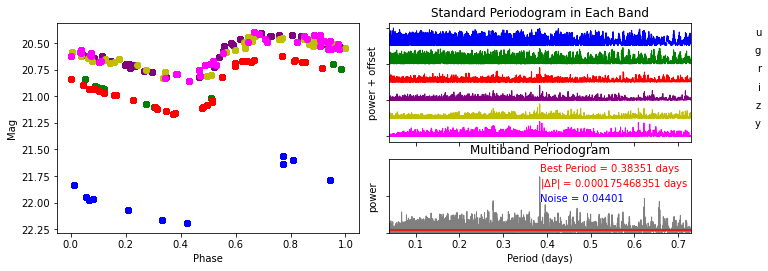

In [8]:
#This cell derive the  period and the noise of Multiband periodogram from simulated light curve with MultibandLombscargle option of Gatspy
#and build a figure that compare  Lombscargle in each band with multiband analysis.
#From https://www.astroml.org/gatspy/periodic/lomb_scargle_multiband.html


########################################################################





fitting...
fitting u band
fitting g band
fitting r band
fitting i band
fitting z band
fitting y band
Final results:
<u>,<g>,<r>,<i>,<z>,<y>,=
21.90876157514209 20.841382659121074 20.87295730955612 20.593987410829925 20.612590019795874 20.608688639391634
<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=
0.595327814393233 0.5619977344156872 0.5971490115073053 0.4188711623960941 0.40115100974611195 0.42026920617025
Chi of the fit=
4.35694327289823e-05 3.4178556143975495e-06 7.618489024650348e-05 4.433890961771244e-05 6.277974273298237e-05 6.469736677231721e-05
Max gap dimension (MGD)=
0.3516770663903692 0.44459318164414086 0.1018584280018402 0.11866015114242146 0.1514035682546364 0.232316759630379
Number of gaps >0.5MGD =
1 1 6 2 1 1


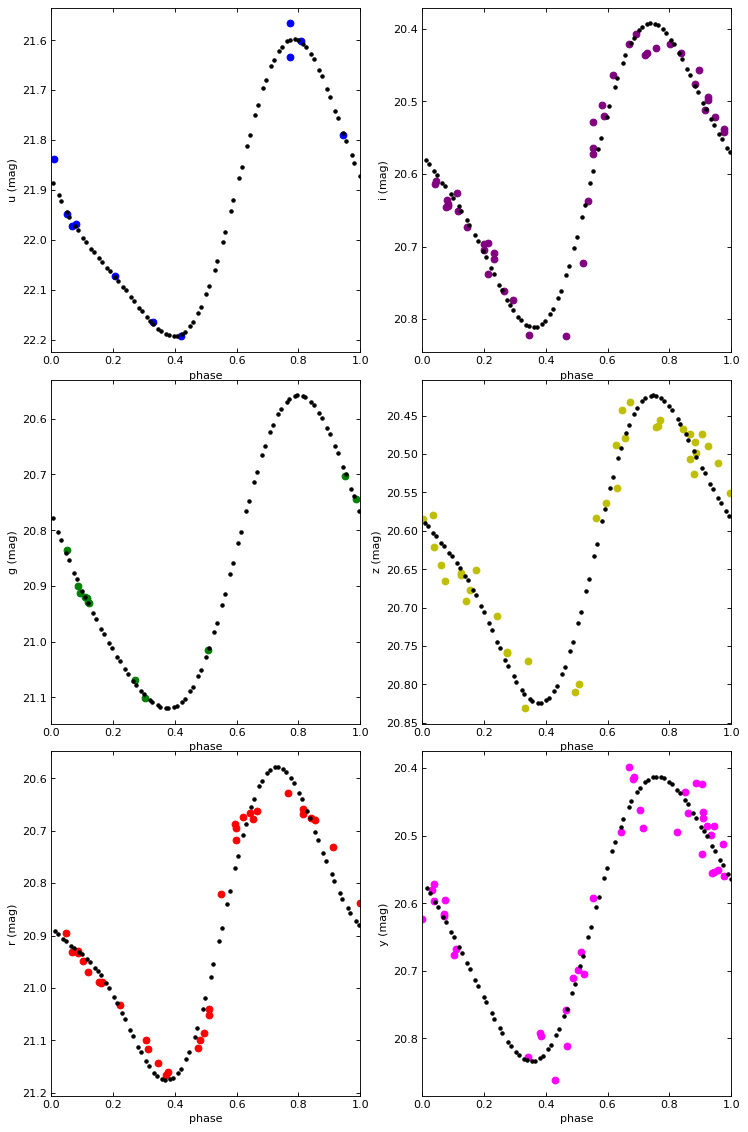

In [9]:

#This metric make the fit of the light curve....(as zeropoint choice LcTheoric['time'][0] or time0)



#...and is useful to have all these information!!
print('Final results:')
print('<u>,<g>,<r>,<i>,<z>,<y>,=')
print(finalResult['mean_u'],finalResult['mean_g'],finalResult['mean_r'],finalResult['mean_i'],finalResult['mean_z'],finalResult['mean_y'])
print('<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=')
print(finalResult['ampl_u'],finalResult['ampl_g'],finalResult['ampl_r'],finalResult['ampl_i'],finalResult['ampl_z'],finalResult['ampl_y'])
print('Chi of the fit=')
print(finalResult['chi_u'],finalResult['chi_g'],finalResult['chi_r'],finalResult['chi_i'],finalResult['chi_z'],finalResult['chi_y'])

print('Max gap dimension (MGD)=')
print(finalResult['maxHoleDimension_u'],finalResult['maxHoleDimension_g'],finalResult['maxHoleDimension_r'],finalResult['maxHoleDimension_i'],finalResult['maxHoleDimension_z'],finalResult['maxHoleDimension_y'])
print('Number of gaps >'+ str(factorForDimensionGap)+'MGD =')
print(finalResult['numberOfHoles_u'],finalResult['numberOfHoles_g'],finalResult['numberOfHoles_r'],finalResult['numberOfHoles_i'],finalResult['numberOfHoles_z'],finalResult['numberOfHoles_y'])

In [6]:
# Questo non ho intenzione di metterlo e' per uso personale....Mean magnitude from mthe model to compare
def meanmag_antilog(mag):
    mag=np.asarray(mag)
    flux=10.**(-mag/2.5)
    return (-2.5)*np.log10(sum(flux)/len(flux))
meanu=meanmag_antilog(LcTeoLSST_noised['magu'])
meang=meanmag_antilog(LcTeoLSST_noised['magg'])
meanr=meanmag_antilog(LcTeoLSST_noised['magr'])
meani=meanmag_antilog(LcTeoLSST_noised['magi'])
meanz=meanmag_antilog(LcTeoLSST_noised['magz'])
meany=meanmag_antilog(LcTeoLSST_noised['magy'])
def initmeans(meanu,meang,meanr,meani,meanz,meany):
    return np.asarray([meanu,meang,meanr,meani,meanz,meany]) 

print('Mean Magnitude (ugrizy) of the Model at distMod and E(B-V)=')
deltau=abs(meanu-finalResult['mean_u'])
deltag=abs(meang-finalResult['mean_g'])
deltar=abs(meanr-finalResult['mean_r'])
deltai=abs(meani-finalResult['mean_i'])
deltaz=abs(meanz-finalResult['mean_z'])
deltay=abs(meany-finalResult['mean_y'])
print(meanu,meang,meanr,meani,meanz,meany)
print('abs(meanmagX-finalresult[mean_X])')
print(deltau,deltag,deltar,deltai,deltaz,deltay)

Mean Magnitude (ugrizy) of the Model at distMod and E(B-V)=
19.033492445743804 17.703753537872206 17.56983135946129 17.282560348618304 17.287204603360006 17.28356127427745
abs(meanmagX-finalresult[mean_X])
0.11636172213459872 0.03748649592927222 0.0594426505736152 0.034097554601355995 0.02314113947760177 0.016489351238163863


In [10]:
print(LcTheoric['g'])

[19.274593283632086, 19.277759103281, 19.28067086568148, 19.283538631187103, 19.286636324628333, 19.290091790020945, 19.293816003032145, 19.297625181097395, 19.301622238698066, 19.305576776914712, 19.309218643999085, 19.312666462751512, 19.3160440882361, 19.319417495483112, 19.32281917238983, 19.32636336043867, 19.330077633982654, 19.333791373670117, 19.33749724557077, 19.341171762831152, 19.34472516148107, 19.34827671058045, 19.35178481856632, 19.355339669373787, 19.359004135755953, 19.36270872475563, 19.36646268153109, 19.370208133248646, 19.373935691864034, 19.377651905326076, 19.381272426197917, 19.38478583240473, 19.388226826685173, 19.39160930787214, 19.394999328840893, 19.398368990064153, 19.4016976597987, 19.404971330902278, 19.40815236309832, 19.41116583038579, 19.414005107128023, 19.416682499121503, 19.41927584763634, 19.421723545817372, 19.42406227512207, 19.426289023954478, 19.42842817596832, 19.43040377820678, 19.43220791303377, 19.433868780430256, 19.43539054316709, 19.43

In [11]:
# Questo non ho intenzione di metterlo e' per uso personale....Mean magnitude from mthe model to compare
def meanmag_antilog(mag):
    mag=np.asarray(mag)
    flux=10.**(-mag/2.5)
    return (-2.5)*np.log10(sum(flux)/len(flux))

meanu=meanmag_antilog(LcTheoric['u'])
meang=meanmag_antilog(LcTheoric['g'])
meanr=meanmag_antilog(LcTheoric['r'])
meani=meanmag_antilog(LcTheoric['i'])
meanz=meanmag_antilog(LcTheoric['z'])
meany=meanmag_antilog(LcTheoric['y'])
def initmeans(meanu,meang,meanr,meani,meanz,meany):
    return np.asarray([meanu,meang,meanr,meani,meanz,meany]) 

print('Mean Magnitude (ugrizy) of the Model at distMod and E(B-V)=')
deltau=abs(meanu-finalResult['mean_u'])
deltag=abs(meang-finalResult['mean_g'])
deltar=abs(meanr-finalResult['mean_r'])
deltai=abs(meani-finalResult['mean_i'])
deltaz=abs(meanz-finalResult['mean_z'])
deltay=abs(meany-finalResult['mean_y'])
print(meanu,meang,meanr,meani,meanz,meany)
print('abs(meanmagX-finalresult[mean_X])')
print(deltau,deltag,deltar,deltai,deltaz,deltay)

Mean Magnitude (ugrizy) of the Model at distMod and E(B-V)=
20.36359578059008 19.276395090350213 19.364692995587593 19.099855508303524 19.111738118233173 19.09598626785086
abs(meanmagX-finalresult[mean_X])
0.008674711096979593 0.0008099889502162227 0.004608194942967714 0.003963056110446672 0.002732416570612628 0.004988834397394726
